# Opening a new restaurants

In this project I have tried to find out the number of restaurants and food courts which are there in Hadapsar, Pune. Based on the number we can predicts that there are possibility of new restaurants and foods courts in this area.

### Import necessary Libraries that will be used in this project

In [1]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


### Define Foursquare Credentials and Version

In [2]:
CLIENT_ID = '15NLYHHTWNIBTFIE11MMLLDBY2XCVE0GE2W55R2J5NI002CQ' # your Foursquare ID
CLIENT_SECRET = 'O3ON0BTWINO1JGA1YX5UYVB4AXD21RZXT4FIOVXUUK15S1KD' # your Foursquare Secret
VERSION = '20180908'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 15NLYHHTWNIBTFIE11MMLLDBY2XCVE0GE2W55R2J5NI002CQ
CLIENT_SECRET:O3ON0BTWINO1JGA1YX5UYVB4AXD21RZXT4FIOVXUUK15S1KD


## Find the Geo location of Hadapsar,Pune

In [3]:
address = 'Hadapsar,Pune'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

/home/jupyterlab/conda/lib/python3.6/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


18.5198046 73.9344461


## A Look of location 'Hadapsar, Pune' on MAP

In [6]:
Location_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate a map centred around of Hadapsar,Pune

folium.features.CircleMarker(
    [latitude, longitude],
    radius=200,
    color='blue',
    popup='Radio of Covent Garden',
    fill = True,
    fill_color = 'white',
    fill_opacity = 0.6
).add_to(Location_map)


Location_map

## Setup of List Restaurant and food courts in Hadapsar, Pune:

In [8]:
restaurant_query = 'Restaurant'
food_query = 'Food'

radius = 800

## Getting information of Restaurant and food courts from Foursquare

In [9]:
restaurant_query_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, restaurant_query, radius, LIMIT)
food_query_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, food_query, radius, LIMIT)


## Fetching data from foursquare to dataframe to build the Report

In [11]:
restaurant_query_results = requests.get(restaurant_query_url).json()
food_query_results = requests.get(food_query_url).json()

print(restaurant_query_results)

{'meta': {'code': 200, 'requestId': '5bbc7d52f594df1de61622f4'}, 'response': {'venues': [{'id': '560b95f7498ee4045dbaea98', 'name': 'Blue rock Family Restaurant', 'location': {'lat': 18.517695, 'lng': 73.933024, 'labeledLatLngs': [{'label': 'display', 'lat': 18.517695, 'lng': 73.933024}], 'distance': 278, 'cc': 'IN', 'country': 'India', 'formattedAddress': ['India']}, 'categories': [{'id': '54135bf5e4b08f3d2429dff0', 'name': 'Punjabi Restaurant', 'pluralName': 'Punjabi Restaurants', 'shortName': 'Punjabi', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1539079506', 'hasPerk': False}, {'id': '4dee3cbcc65bf34fc6e74dd7', 'name': '@M Coffee Shop And Restaurant', 'location': {'address': 'Cocoon Hotel Magarpatta City', 'lat': 18.517471681542858, 'lng': 73.93251192411122, 'labeledLatLngs': [{'label': 'display', 'lat': 18.517471681542858, 'lng': 73.93251192411122}], 'distance': 330, 'postalCode': '411013', 'cc':

In [14]:
restaurant_venues = restaurant_query_results['response']['venues']
restaurant_dataframe = json_normalize(restaurant_venues)

restaurant_filtered_columns = ['name', 'categories'] + [col for col in restaurant_dataframe.columns if col.startswith('location.')] + ['id']
restaurant_dataframe_filtered = restaurant_dataframe.loc[:,restaurant_filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        
        return categories_list[0]['name']
restaurant_dataframe_filtered['categories'] = restaurant_dataframe_filtered.apply(get_category_type, axis=1) 

restaurant_dataframe_filtered.columns = [column.split('.')[-1] for column in restaurant_dataframe_filtered.columns]

print(restaurant_dataframe_filtered['name'].head(3))

0      Blue rock Family Restaurant
1    @M Coffee Shop And Restaurant
2                Z plus restaurant
Name: name, dtype: object


In [15]:
food_venues = food_query_results['response']['venues']
food_dataframe = json_normalize(food_venues)

food_filtered_columns = ['name', 'categories'] + [col for col in food_dataframe.columns if col.startswith('location.')] + ['id']
food_dataframe_filtered = food_dataframe.loc[:,food_filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        
        return categories_list[0]['name']
food_dataframe_filtered['categories'] = food_dataframe_filtered.apply(get_category_type, axis=1) 

food_dataframe_filtered.columns = [column.split('.')[-1] for column in food_dataframe_filtered.columns]

print(food_dataframe_filtered['name'].head(3))

0    Seasons Food Court
1    Amanora Food Court
2           Food United
Name: name, dtype: object




## Generating map of Restaurant and Food Courts 



In [17]:
Location_map = folium.Map(location=[latitude, longitude], zoom_start=14) # generate a map centred around Hadapsar, Pune

folium.features.CircleMarker(
    [latitude, longitude],
    radius=200,
    color='blue',
    popup='Radio of Covent Garden',
    fill = True,
    fill_color = 'white',
    fill_opacity = 0.6
).add_to(Location_map)

#  restaurants as blue circle markers
for lat, lng, label in zip(restaurant_dataframe_filtered.lat, restaurant_dataframe_filtered.lng, restaurant_dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Location_map)
   
# food couts as red circle markers
for lat, lng, label in zip(food_dataframe_filtered.lat, food_dataframe_filtered.lng, food_dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(Location_map)
    

# display map
Location_map

## Converting the dataframe to find the count and distance between them

In [19]:
restaurant_dataframe_filtered['type'] = 'restaurant'
food_dataframe_filtered['type'] = 'food'

AllnoRes = pd.DataFrame()
AllnoRes = pd.concat([restaurant_dataframe_filtered,food_dataframe_filtered])
AllnoResList = AllnoRes[['name','distance','type', 'id']]
AllnoResList.groupby('type').count()

,name,distance,id
type,,,
food,9,9,9
restaurant,6,6,6


## Number of Restaurants and food courts in Hadapsar, Pune in a bar chart.

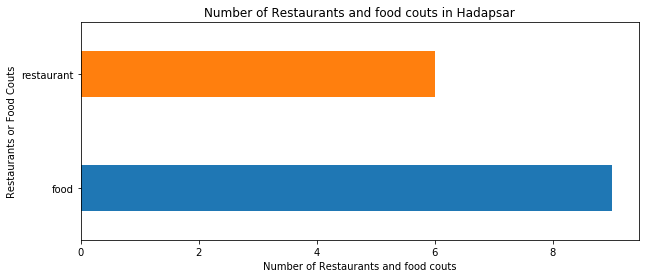

In [22]:
import matplotlib.pyplot as plt
AllnoResList.groupby('type')['name'].count().plot(kind = 'barh', figsize=(10, 4), width=0.4)
plt.title('Number of Restaurants and food couts in Hadapsar')
plt.xlabel('Number of Restaurants and food couts')
plt.ylabel("Restaurants or Food Couts")
plt.show()

## Generating the distance between each restaurant and food courts in Hadapsar, Pune

In [24]:
avgDistance = AllnoResList.groupby('type')['distance'].mean()
avgDistance

type
food          387.777778
restaurant    395.000000
Name: distance, dtype: float64

## Generating a bar chart of the distance between each restaurant and food courts in Hadapsar, Pune

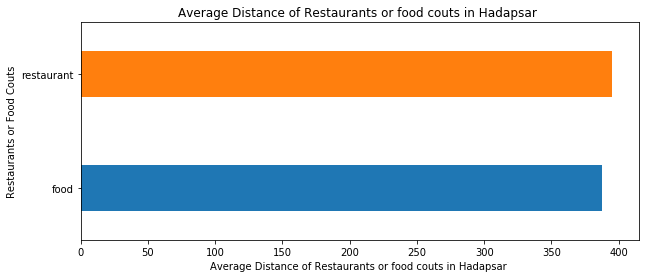

In [25]:
avgDistance.plot(kind = 'barh', figsize=(10, 4), width=0.4)
plt.title('Average Distance of Restaurants or food couts in Hadapsar ')
plt.xlabel('Average Distance of Restaurants or food couts in Hadapsar ')
plt.ylabel("Restaurants or Food Couts")
plt.show()

# Conclusion of Project

Note: The business problem here is clear that we don't have much choice of restaurant and food courts so, it is advisable to open new restaurant and food courts in this area and it will be profitable as we don't have much competition.  

In [30]:
restaurant_dataframe_filtered.columns

Index(['name', 'categories', 'address', 'cc', 'city', 'country', 'crossStreet',
       'distance', 'formattedAddress', 'labeledLatLngs', 'lat', 'lng',
       'postalCode', 'state', 'id', 'type'],
      dtype='object')

In [34]:
food_dataframe_filtered[['name', 'address', 'distance']]

,name,address,distance
0,Seasons Food Court,"Seasons Mall, Magarpatta City",358
1,Amanora Food Court,Amanora Town Center,183
2,Food United,"Food Court, Seasons Mall",370
3,Farm2Kitchen Organic Food & Lifestyle Store,"Seasons Mall, Magarpatta City",318
4,Khorisa - Authentic Assamese Food,Seasons Mall,401
5,Hotel OM Snacks and Fast Food,Opposite Magarpatta City Main Gate,560
6,Akshay Chinese Food,Hadapsar,580
7,Farm2Kitchen Organic Store,"Seasons Mall, Magarpatta City",304
8,Foodcourt,"Seasons Mall, Magarpatta City",416


AttributeError: 'function' object has no attribute 'columns'